In [31]:
import csv
import numpy as np
import matplotlib.pyplot
%matplotlib inline

Load data

In [11]:
train_path='./mnist_train.csv'
test_path='./mnist_test.csv'

In [79]:
class_num=10

In [43]:
def load_data(path):
    data=[]
    label=[]
    f = open(path, 'r', encoding='utf-8')
    reader = csv.reader(f)
    for line in reader:
        label.append(int(line[0]))
        data.append(list(map(int, line[1:])))
    f.close()   
    return label, data

In [44]:
train_label, train_data=load_data(train_path)
train_data=np.reshape(train_data, (-1, 28, 28))

In [45]:
test_label, test_data=load_data(test_path)
test_data=np.reshape(test_data, (-1, 28, 28))

In [46]:
np.shape(train_data)

(60000, 28, 28)

In [47]:
np.shape(test_data)

(10000, 28, 28)

In [77]:
#one-hot encoding
train_label=np.eye(class_num)[train_label]
test_label=np.eye(class_num)[test_label]

In [48]:
check=60

label: 4


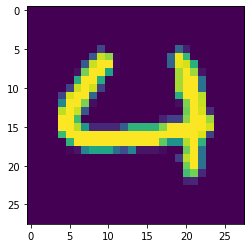

In [49]:
matplotlib.pyplot.imshow(train_data[check]) 
print('label:', train_label[check])

In [58]:
#Normalization

train_data=train_data/255
test_data=test_data/255

MLP

In [231]:
class MLP():
    def __init__(self, batch):
        self.batch=batch
        self.W_1=np.random.rand(28*28, 512)
        self.b_1=np.random.rand(self.batch, 512)
        self.W_2=np.random.rand(512, 10)
        self.b_2=np.random.rand(batch, 10)
    
    def relu(self, x):
        return np.maximum(0, x)
    
    def sigmoid(self, x, der=False):
        if der==False:
            return 1/(1+np.exp(-1*x))
        else:
            return (1/(1+np.exp(-1*x)))*(1- (1/(1+np.exp(-1*x))))
    
    def softmax(self, x, der=False):
        #ex=np.exp(x-np.max(x, axis=1, keepdims=True))
        ex=np.exp(x)
        return ex/np.sum(ex, axis=1, keepdims=True) 
    
    def forward(self, x):
        x=np.dot(x.reshape(self.batch, -1), self.W_1)
        x=self.b_1+x
        x=self.sigmoid(x)
        x=np.dot(x, self.W_2)
        x=self.b_2+x
        prob=self.softmax(x)
        return prob
    
    def backward(self, pred, label):
        dx=(pred-label)/self.batch
        return dx

In [232]:
def crossEntropy(y, label):
    delta=int(1e-7)
    return -1*np.sum(label*np.log(y+delta))

In [233]:
def train(x, label):
    batch=128
    layer=MLP(batch)
    pred=layer.forward(x)
    loss=crossEntropy(pred, label)
    print(loss)
    dx=layer.backward(pred, label)
    print(dx)

In [234]:
#for i in range(0, len(train_data), batch):
for i in range(0, 128, batch):
    train(train_data[i:i+batch], train_label[i:i+batch])
    

1042.4064302627971
[[ 1.12860964e-05  6.82967180e-07  3.97273325e-08 ...  1.02201016e-05
   2.23047326e-06  7.73793446e-03]
 [-7.80639812e-03  5.71901785e-07  7.02390173e-08 ...  8.76597434e-06
   3.64020116e-06  7.74275204e-03]
 [ 6.71847862e-06  1.01733735e-06  8.41959794e-08 ...  1.89313208e-05
   5.44784673e-06  7.64997700e-03]
 ...
 [ 4.65370036e-06  6.74889080e-07  4.37845002e-08 ...  1.11476674e-05
  -7.80910734e-03  7.73931517e-03]
 [ 1.23736768e-05  1.54917233e-06  9.08529600e-08 ...  2.34827288e-05
   3.61676511e-06  7.68539702e-03]
 [ 8.53698869e-06  5.75490061e-07  4.82168520e-08 ...  9.62029302e-06
   3.67611895e-06  7.71715836e-03]]
